In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd
import numpy as np

In [76]:
path ='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/newdata_all_0820_rotate_32_x.xlsx'

In [77]:
data = pd.read_excel(path)

In [78]:
X = data.drop(['y','image'], axis=1)

In [79]:
y = data["y"]

In [80]:
X

,x_1-0,y_1-0,x_2-1,y_2-1,x_3-2,y_3-2,x_4-3,y_4-3,x_5-4,y_5-4,x_6-5,y_6-5,x_7-6,y_7-6,x_8-7,y_8-7,x_9-8,y_9-8,x_10-9,y_10-9,x_11-10,y_11-10,x_12-11,y_12-11,x_13-12,y_13-12,x_14-13,y_14-13,x_15-14,y_15-14,x_16-15,y_16-15
0,0.059483,0.047791,0.117681,0.037177,0.108911,-6.938894e-18,0.102761,0.000781,-0.067272,0.106284,0.090851,-0.037551,0.020762,-0.053539,-0.000663,-0.049232,-0.126677,0.091841,0.074080,-0.048951,-0.034998,-0.067212,-0.034704,-0.052495,-0.026695,0.121091,0.025404,-0.065380,-0.065823,-0.059163,-0.049266,-0.037874
1,0.088238,0.039870,0.111497,0.031659,0.106251,-6.938894e-18,0.091216,-0.000797,-0.054548,0.126776,0.064970,-0.066325,-0.015064,-0.069841,-0.022040,-0.044777,-0.031284,0.136956,0.062474,-0.060135,-0.055480,-0.073939,-0.047930,-0.042525,0.024458,0.131533,0.032674,-0.068518,-0.067078,-0.067196,-0.046953,-0.033332
2,0.074786,0.029389,0.109923,0.027463,0.106390,0.000000e+00,0.090829,-0.003327,-0.042942,0.127572,0.069100,-0.056238,-0.007140,-0.065612,-0.020420,-0.050944,-0.049653,0.131762,0.065004,-0.057998,-0.050233,-0.072696,-0.049552,-0.050360,0.016472,0.136776,0.032386,-0.064413,-0.066488,-0.063819,-0.047665,-0.037979
3,0.075837,0.025564,0.108562,0.021815,0.115656,-6.938894e-18,0.094668,-0.005780,-0.051041,0.129546,0.071232,-0.069228,-0.020892,-0.076479,-0.031390,-0.052954,-0.022616,0.162404,0.058829,-0.075954,-0.062551,-0.085586,-0.056928,-0.055934,0.041617,0.175992,0.026054,-0.081117,-0.064761,-0.074281,-0.045816,-0.045548
4,0.096608,0.045197,0.114652,0.033341,0.106542,6.938894e-18,0.096588,-0.000523,-0.063558,0.112743,0.075623,-0.047701,0.015439,-0.055260,-0.006942,-0.049723,-0.100304,0.102963,0.057556,-0.060177,-0.023646,-0.069867,-0.034987,-0.056994,-0.023224,0.139539,0.026484,-0.071770,-0.054111,-0.063163,-0.042928,-0.044375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.155021,0.077519,0.174503,0.043141,0.152823,1.387779e-17,0.149967,0.021214,-0.114225,0.115594,0.145628,-0.022340,0.007679,-0.082363,-0.052359,-0.088204,-0.136920,0.115682,0.147726,-0.029766,-0.007167,-0.097603,-0.045154,-0.085594,-0.141017,0.135980,0.109007,-0.045937,-0.019847,-0.096490,-0.047022,-0.078923
1184,0.150196,0.090659,0.170437,0.048558,0.146912,0.000000e+00,0.142907,0.021097,-0.110664,0.114058,0.144921,-0.007870,0.015625,-0.076645,-0.047765,-0.089171,-0.140453,0.090576,0.154072,-0.009768,0.009694,-0.089330,-0.034426,-0.086298,-0.171909,0.103428,0.112784,-0.035927,-0.006997,-0.094875,-0.035708,-0.083506
1185,0.150619,0.092911,0.163893,0.047062,0.142344,0.000000e+00,0.142907,0.021708,-0.101500,0.107907,0.147984,0.000143,0.015389,-0.069576,-0.055730,-0.085872,-0.140190,0.070350,0.154307,-0.007271,0.005616,-0.084368,-0.046397,-0.083842,-0.158008,0.092519,0.113788,-0.029118,-0.012646,-0.086687,-0.049147,-0.077047
1186,0.144129,0.091378,0.167189,0.047378,0.148878,0.000000e+00,0.146398,0.022524,-0.106003,0.109750,0.138529,-0.006895,0.006532,-0.076884,-0.059461,-0.090202,-0.110858,0.091502,0.151581,-0.007886,0.000093,-0.089106,-0.046714,-0.087615,-0.147400,0.102553,0.113283,-0.030557,-0.013723,-0.091946,-0.047030,-0.083713


In [81]:
path2='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/preprocessing/correct38_semi_final.xlsx'

In [82]:
testdata = pd.read_excel(path2)
new_x = testdata.drop(['d_ratio','sin dif','y','image'], axis=1)
#y = data["y"]

In [83]:
#X1 = data[data['y']==1]
#X0 = data[data['y']==0]

In [84]:
#X1 = X1.drop(['Unnamed: 0','y','image'], axis = 1)
#X0 = X0.drop(['Unnamed: 0','y','image'], axis = 1)

#모델

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#ROC curve

In [86]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

decisiontree

In [87]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [88]:
#clf.fit(X_train,y_train)
#testdata_pred=clf.predict(new_x)
#if sum(testdata_pred == 1) > sum(testdata_pred == 0):
#  print("올바른 젓가락질입니다.")
#elif sum(testdata_pred == 1) == sum(testdata_pred == 0):
#  print("재촬영해주세요.")
#else:
#  print("올바르지 않은 젓가락질입니다.")

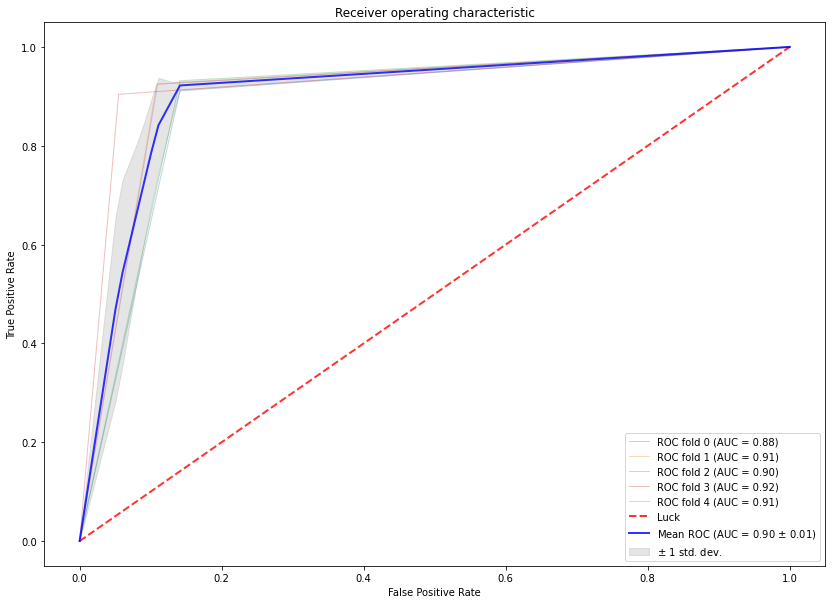

,AUC Train,AUC Test
0,1.0,0.884827
1,1.0,0.907981
2,1.0,0.895101
3,1.0,0.924582
4,1.0,0.907384


In [89]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc


cv = StratifiedKFold(n_splits=5, random_state=1004, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
#clf.feature_importances_

In [90]:
#clf.fit(X_train,y_train)
testdata_pred=clf.predict(new_x)
print(testdata_pred)

if sum(testdata_pred == 1) > sum(testdata_pred == 0):
  print("올바른 젓가락질입니다.")
elif sum(testdata_pred == 1) == sum(testdata_pred == 0):
  print("재촬영해주세요.")
else:
  print("올바르지 않은 젓가락질입니다.")

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
올바른 젓가락질입니다.


knn

In [91]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

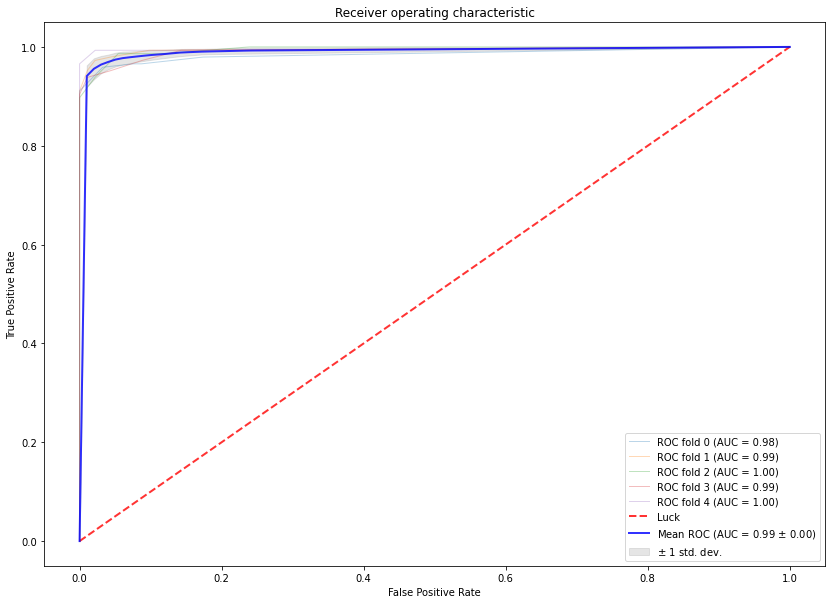

,AUC Train,AUC Test
0,0.998627,0.984999
1,0.998323,0.994491
2,0.998625,0.995272
3,0.998446,0.991796
4,0.997674,0.995823


In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc


cv = StratifiedKFold(n_splits=5, random_state=1004, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [93]:
#clf.fit(X_train,y_train)
testdata_pred=clf.predict(new_x)
print(testdata_pred)

if sum(testdata_pred == 1) > sum(testdata_pred == 0):
  print("올바른 젓가락질입니다.")
elif sum(testdata_pred == 1) == sum(testdata_pred == 0):
  print("재촬영해주세요.")
else:
  print("올바르지 않은 젓가락질입니다.")

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
올바른 젓가락질입니다.


randomforest

In [94]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier()

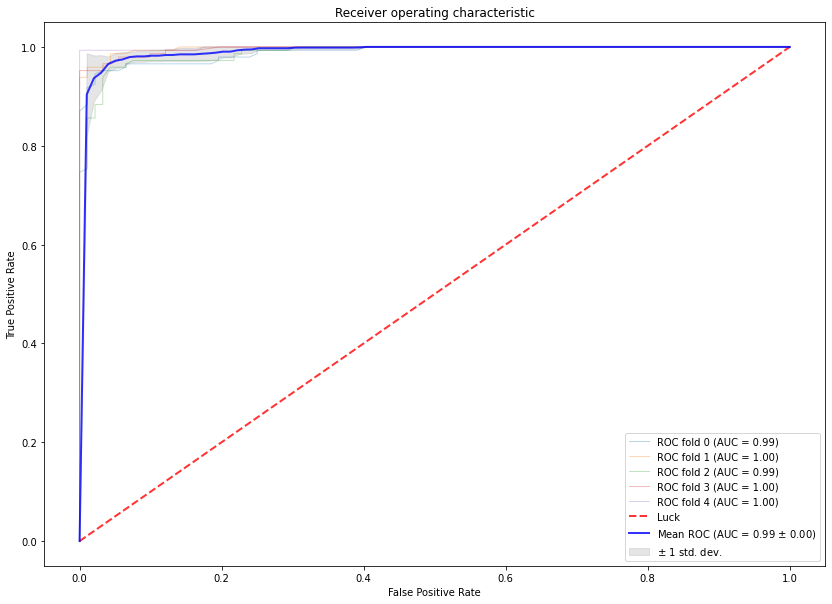

,AUC Train,AUC Test
0,1.0,0.989205
1,1.0,0.997208
2,1.0,0.988163
3,1.0,0.996086
4,1.0,0.998833


In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc


cv = StratifiedKFold(n_splits=5, random_state=1004, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [96]:
#clf.fit(X_train,y_train)
testdata_pred=clf.predict(new_x)
print(testdata_pred)

if sum(testdata_pred == 1) > sum(testdata_pred == 0):
  print("올바른 젓가락질입니다.")
elif sum(testdata_pred == 1) == sum(testdata_pred == 0):
  print("재촬영해주세요.")
else:
  print("올바르지 않은 젓가락질입니다.")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
올바른 젓가락질입니다.
